# MAP535 Regression - Data Project : Abalone Set

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
np.random.seed(42)
sns.set_theme()

## Part I: EDA and Model validation

In [2]:
COLUMNS = [
  'Sex',
  'Length',
  'Diameter',
  'Height',
  'Whole weight',
  'Shucked weight',
  'Viscera weight',
  'Shell weight',
  'Rings'
]
df = pd.read_csv('./abalone.txt', names=COLUMNS, sep=',')
df['Age'] = df['Rings'] + 1.5

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [4]:
indexes = np.random.choice(len(df), np.int(len(df) * 0.7), replace=False)
df_train = df.loc[indexes]
df_test = df.loc[~(df.index.isin(indexes))]

### Question 1.

We are interested in using some abalones physical measurements, such as their height, to predict their ages. Biologists believe that a simple linear model with normal error assumption to describe the relationship between the height of the abalones and their ages.

In this simple linear model setting, the quantative response ($Y$) we are trying to predict is the age and the single predictor variable ($X$) is the height. Mathematically, we can write this relationship as

$$Y \approx \beta_{0} + \beta_{1}X$$

The $\textit{true}$ relationship between $Y$ and $X$ takes the form of

$$Y = \beta_{0} + \beta_{1}X + \varepsilon$$

where $\varepsilon$ is a mean-zero random error term, as stated in the description.

We will implement confidence intervals and tests on the parameters of this model, in particular to quantify the influence of the explanatory variable, the height of the abalones, on the variable to be explained, their ages.

### Question 2.

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


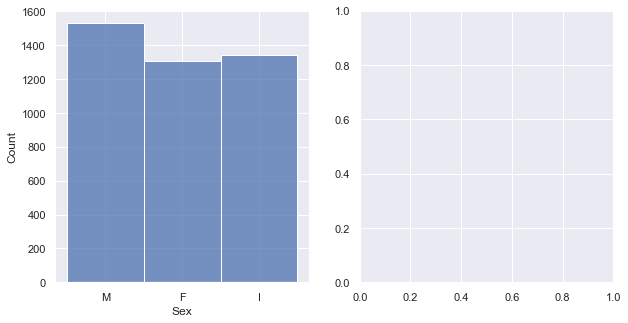

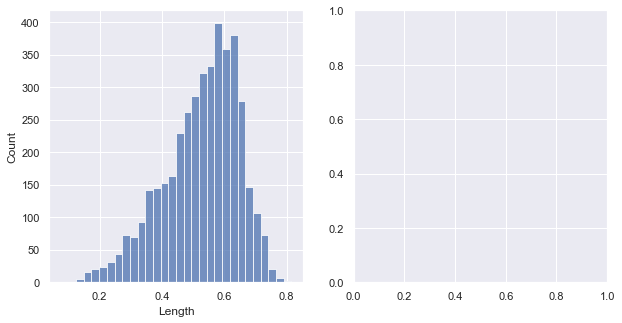

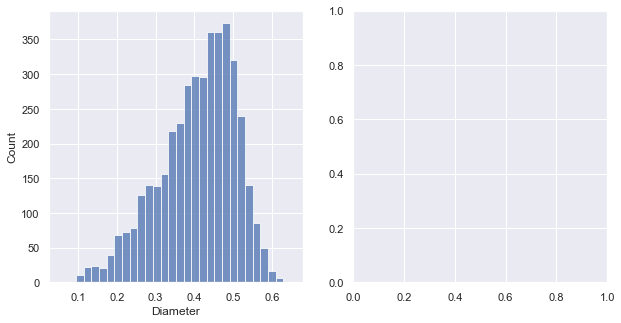

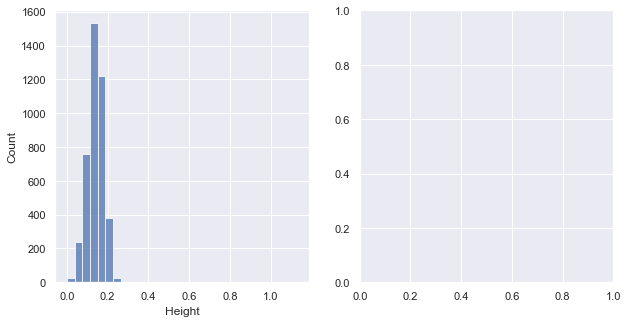

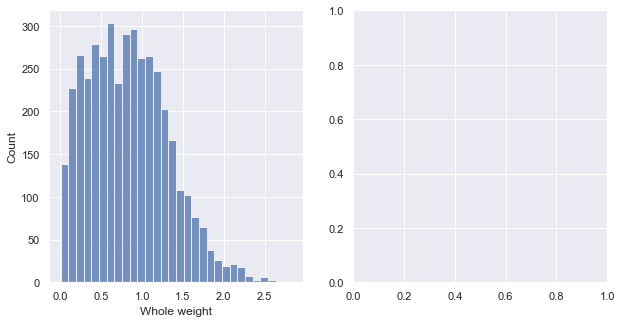

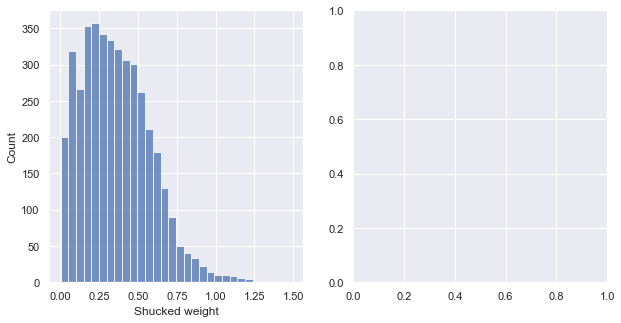

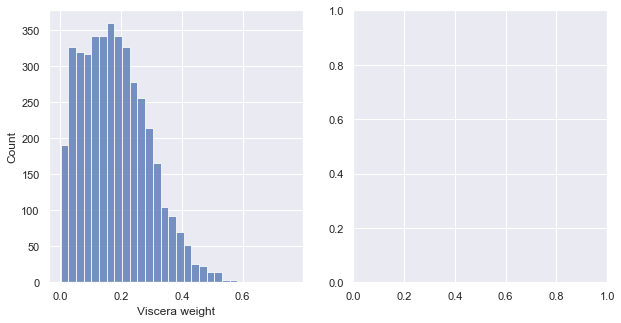

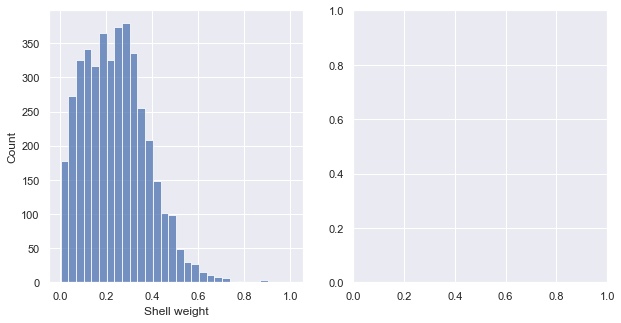

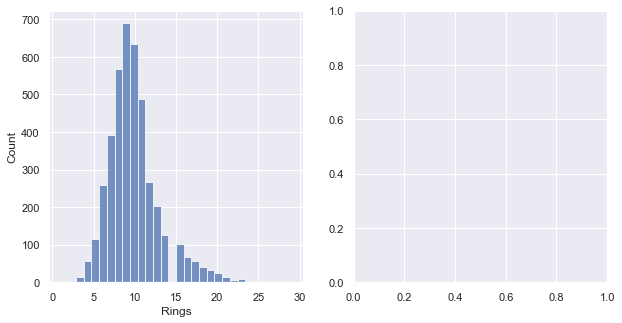

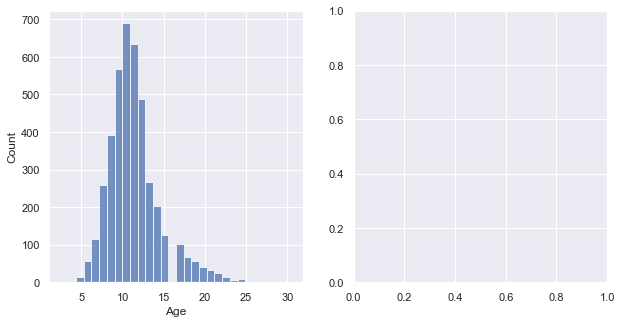

In [6]:
for col in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(df, x=col, bins=30, ax=ax1)
    # sns.boxplot(x=df[col], ax=ax2)

The variable Length and Diameter are heavily left skewed, with central values of 0.6 for Length and 0.5 for Diameter. The dispersion, measured by the standard variations, is significant for both variables, i.e. the variables are well spread.

The variable Height seems centered around its mean of 0.14. The distribution seems pretty symmetric and the dispersion is very small: the values are packed.

For the four weight variables (whole, schucked, viscera and shell), we can observe the same tendancies. They are all heavily right skewed and have well spread values.

The variable Rings is left skewed and seems to follow a form or normal disbribution centered around its mean of $\approx$ 10.

We have slightly more males thand females or infants, but the distribution is still relatively homogeneous.

### Question 3.

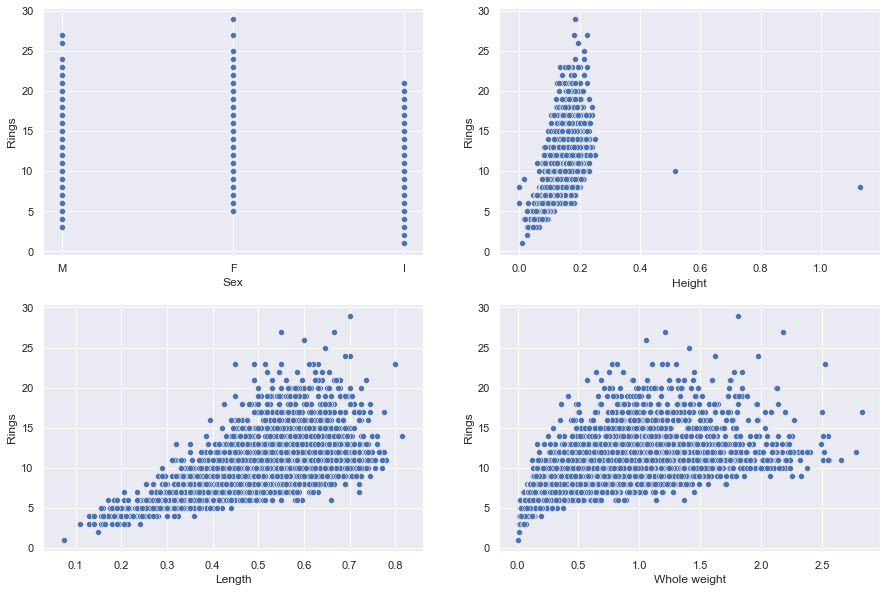

In [7]:
cols = ['Sex', 'Height', 'Length', 'Whole weight']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i in range(len(cols)):
    sns.scatterplot(data=df, x=cols[i], y='Rings', ax=axes[i])

We decided to generate scatterplots with Rings on the y-axis and variables Sex, Height, Length and Whole weight on the x-axes.

There is a positive relationship between the height of the abalones and their ages (Rings + 1.5). The biologists' hypothesis appears to be valid.

There seem to be other forms of relationships between Rings and the other variables. They all have different shapes, but they all seem positive.

### Question 4.

In [8]:
results = smf.ols('Rings ~ Height', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:17:51   Log-Likelihood:                -10039.
No. Observations:                4177   AIC:                         2.008e+04
Df Residuals:                    4175   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9385      0.144     27.302      0.000       3.656       4.221
Height        42.9714      0.990     43.388      0.000      41.030      44.913
==============================================================================
Omnibus:                     1152.248   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80909.975
Skew:                           0.369   Prob(JB):                         0.00
Kurtosis:                      24.549   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 5.

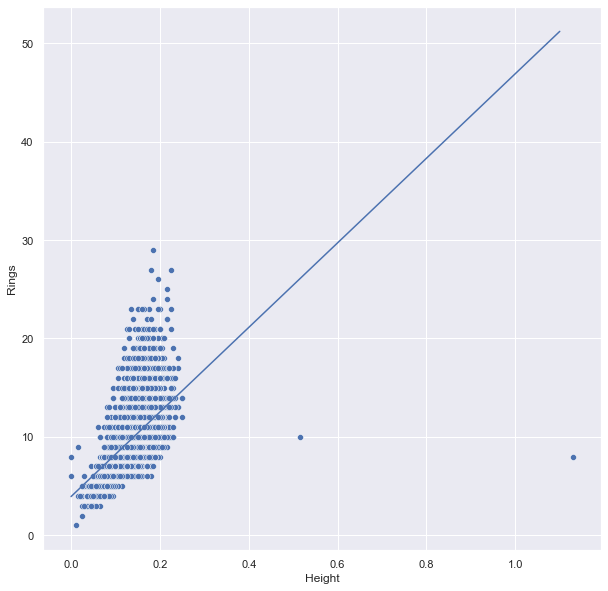

In [12]:
X = np.linspace(0.0, 1.1, 100)
a, b = results.params.Height, results.params.Intercept
Y = a * X + b
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Height', y='Rings')
plt.plot(X, Y);

The regression line does not seem to fit the data. It seems that the $y_{j}$ (Rings) are linear with respect to the $\exp^{x_{j}}$ (exponential of Height).

### Question 6.

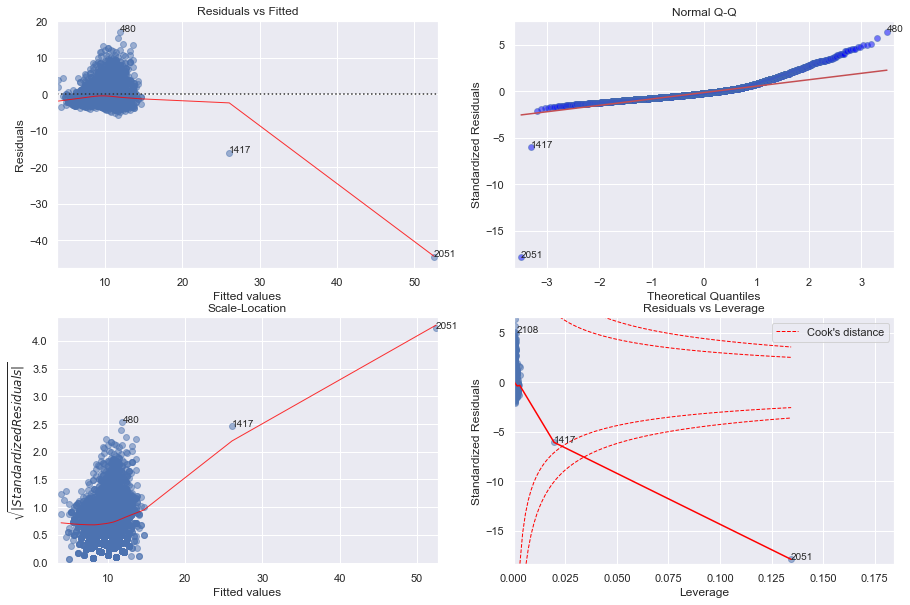

In [10]:
from diagnostic_plots import plot
plot(results)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


-------------
Rings predicted by height
                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1882.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:17:54   Log-Likelihood:                -10039.
No. Observations:                4177   AIC:                         2.008e+04
Df Residuals:                    4175   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


-------------
log_Rings predicted by height
                            OLS Regression Results                            
Dep. Variable:              log_Rings   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     2681.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:17:54   Log-Likelihood:                -1655.8
No. Observations:                4177   AIC:                             3316.
Df Residuals:                    4175   BIC:                             3328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


-------------
sqrt_Rings predicted by height
                            OLS Regression Results                            
Dep. Variable:             sqrt_Rings   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2303.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:17:55   Log-Likelihood:                -2073.1
No. Observations:                4177   AIC:                             4150.
Df Residuals:                    4175   BIC:                             4163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


-------------
log_sqrt_Rings predicted by height
                            OLS Regression Results                            
Dep. Variable:         log_sqrt_Rings   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     2681.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:17:55   Log-Likelihood:                 2770.4
No. Observations:                4177   AIC:                            -5537.
Df Residuals:                    4175   BIC:                            -5524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


-------------
sqrt_log_Rings predicted by height
                            OLS Regression Results                            
Dep. Variable:         sqrt_log_Rings   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     2730.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:17:56   Log-Likelihood:                 4328.3
No. Observations:                4177   AIC:                            -8653.
Df Residuals:                    4175   BIC:                            -8640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

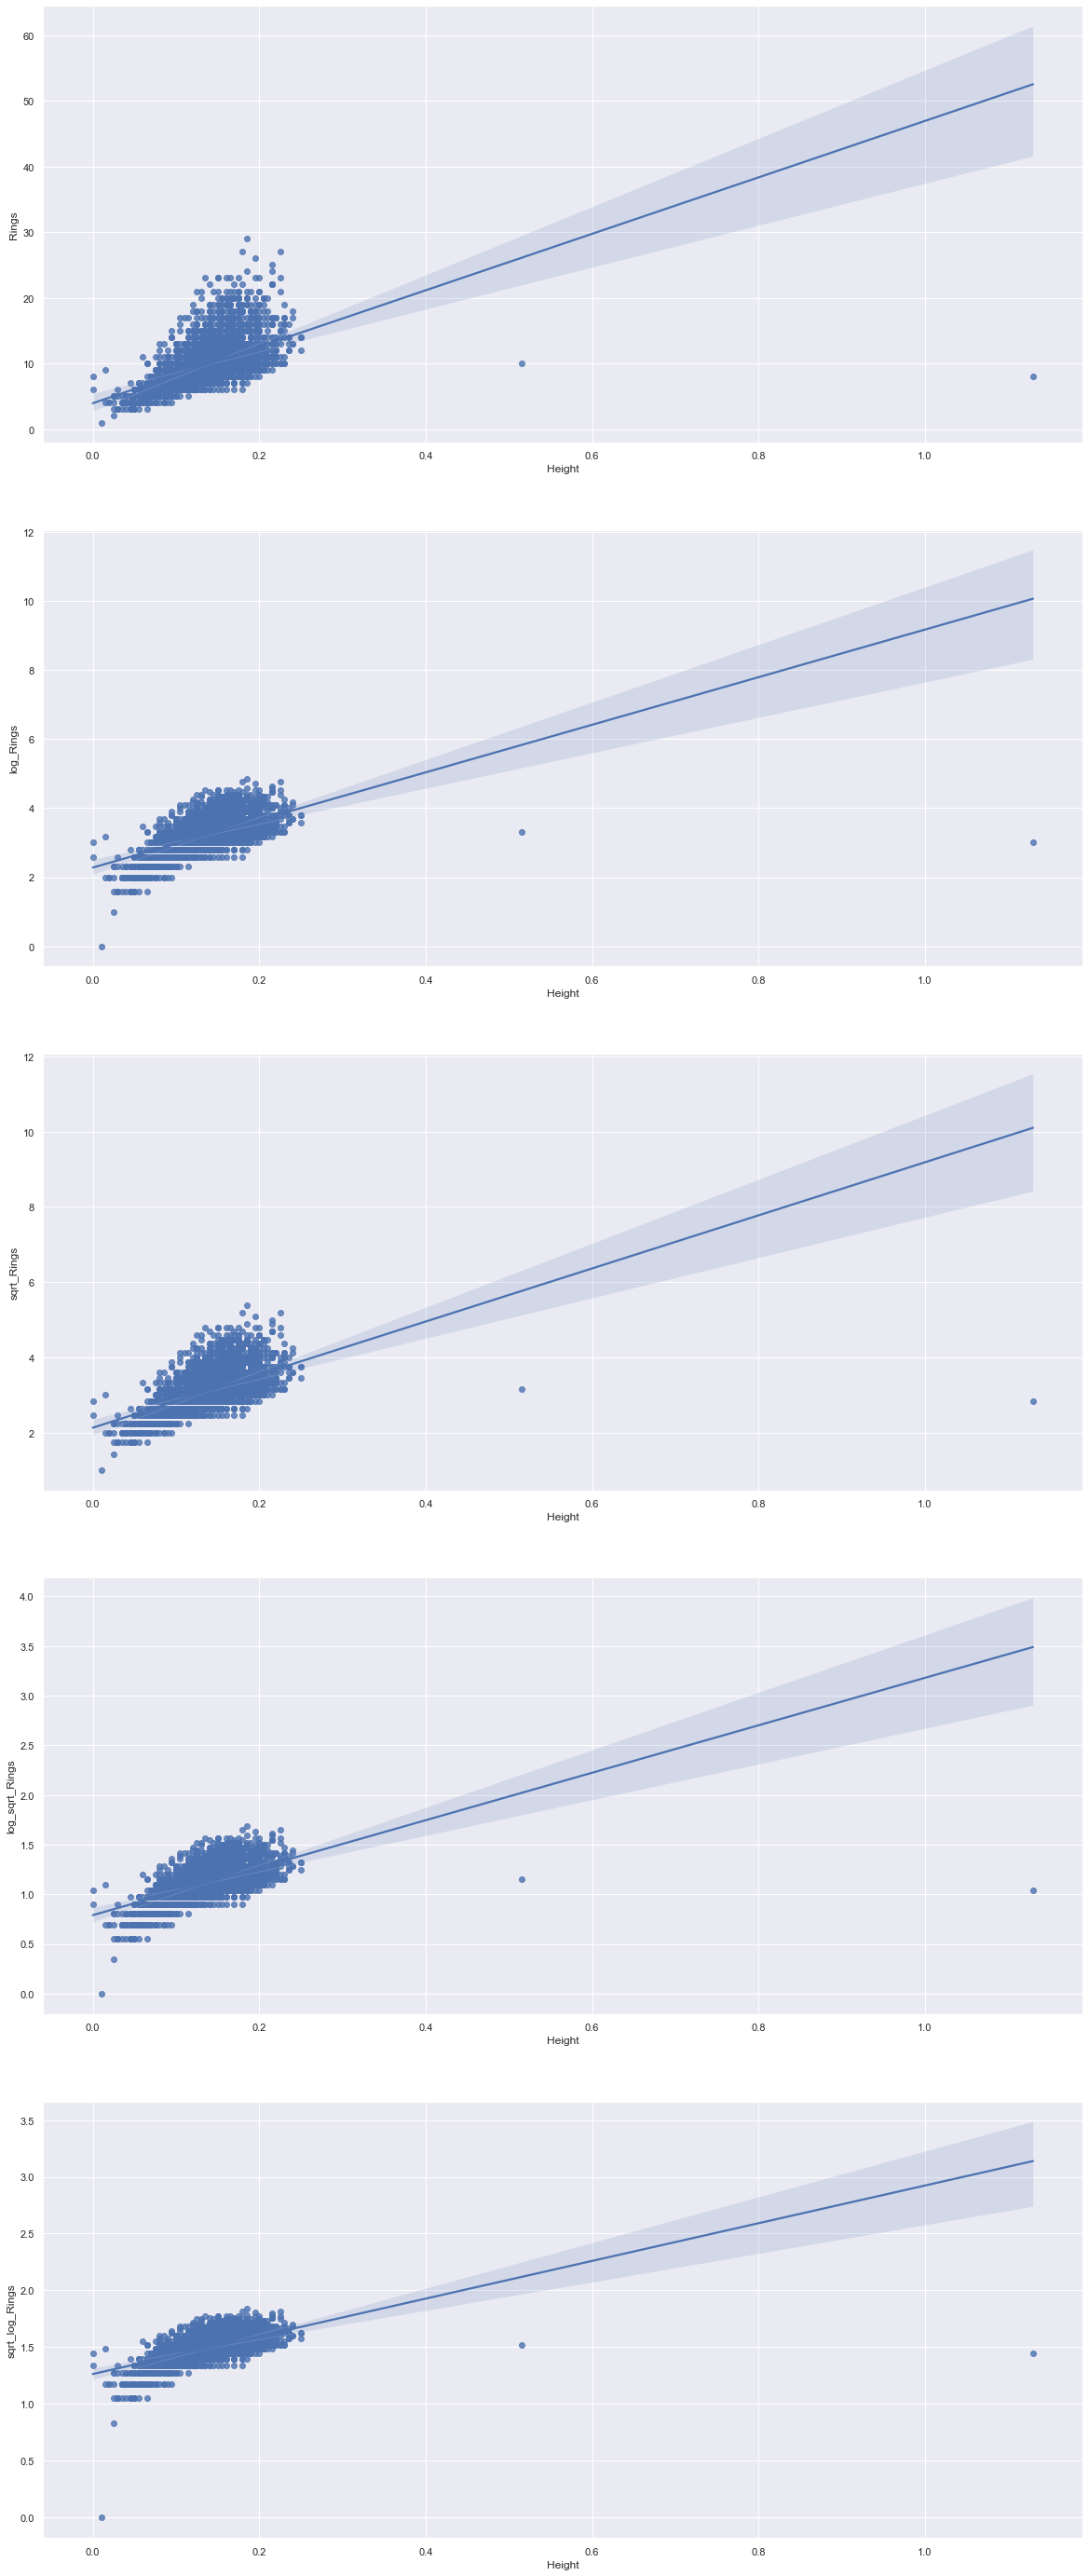

In [11]:
df['log_Rings'] = np.log2(df['Rings'])
df['sqrt_Rings'] = np.sqrt(df['Rings'])
df['sqrt_Rings'] = np.sqrt(df['Rings'])
df['log_sqrt_Rings'] = np.log(np.sqrt(df['Rings']))
df['sqrt_log_Rings'] = np.sqrt(np.log(df['Rings']))
fig, axes = plt.subplots(5, 1, figsize=(20, 50))
axes = axes.flatten()
y_axes = ['Rings', 'log_Rings', 'sqrt_Rings', 'log_sqrt_Rings', 'sqrt_log_Rings']
for y, ax in zip(y_axes, axes):
    X = sm.add_constant(df['Height'])
    result = sm.OLS(df[y], X).fit()
    print('-------------')
    print(y + ' predicted by height')
    print(result.summary())
    sns.regplot(x='Height', y=y, data=df, ax=ax)